# installation de la bibliotheque requests pour faire des requete sur une API

In [ ]:
!pip install requests

In [7]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
# clé API
api_key = 'c257d0b88114e77a1432946364b9f8bd'

# URL de base de l'API Scopus
url = 'https://api.elsevier.com/content/search/scopus'

# Paramètres de la requête
params = {
    'query': 'ALL(test)',  # Requête de test
    'apiKey': api_key,
    'count': 25,  # Nombre de résultats par page
    'start': 0   # Index de départ
}

# En-têtes de la requête
headers = {
    'Accept': 'application/json'
}

# requete pour tester la validité de la clé

In [ ]:
# Envoyer la requête
response = requests.get(url, headers=headers, params=params)

# Vérifier le statut de la réponse
if response.status_code == 200:
    print("La clé API est valide.")
    # Formater la réponse JSON pour une meilleure lisibilité
    response_json = response.json()
    formatted_json = json.dumps(response_json, indent=4)
    print("Réponse de l'API:")
    print(response.json()) # remplacer par formatted_json pour une meilleur clarté

    # Total des résultats
    total_results = int(response_json.get('search-results', {}).get('opensearch:totalResults', 0))
    print(f"Nombre total de publications trouvées: {total_results}")

    # Nombre de publications sur la page actuelle
    num_publications = len(response_json.get('search-results', {}).get('entry', []))
    print(f"Nombre de publications sur la page actuelle: {num_publications}")
else:
    print("La clé API n'est pas valide ou il y a un autre problème.")
    print("Statut de la réponse:", response.status_code)
    print("Message d'erreur:", response.text)

La clé API est valide.
Réponse de l'API:
{'search-results': {'opensearch:totalResults': '13851595', 'opensearch:startIndex': '0', 'opensearch:itemsPerPage': '25', 'opensearch:Query': {'@role': 'request', '@searchTerms': 'ALL(test)', '@startPage': '0'}, 'link': [{'@_fa': 'true', '@ref': 'self', '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=ALL%28test%29&apiKey=c257d0b88114e77a1432946364b9f8bd', '@type': 'application/json'}, {'@_fa': 'true', '@ref': 'first', '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=ALL%28test%29&apiKey=c257d0b88114e77a1432946364b9f8bd', '@type': 'application/json'}, {'@_fa': 'true', '@ref': 'next', '@href': 'https://api.elsevier.com/content/search/scopus?start=25&count=25&query=ALL%28test%29&apiKey=c257d0b88114e77a1432946364b9f8bd', '@type': 'application/json'}, {'@_fa': 'true', '@ref': 'last', '@href': 'https://api.elsevier.com/content/search/scopus?start=4975&count=25&query=ALL%28test%29&apiKey=c2

# requete pour cree notre daaset et la transformer en dataframe grace a **pandas**

In [ ]:
base_params = {
    'query': 'ALL(test)',  # Requête de test
    'apiKey': api_key,
    'count': 25,  # Nombre de résultats par page
    'start': 0   # Index de départ
}

# Initialiser la liste pour accumuler les entrées
all_entries = []

# Nombre de publications à récupérer par requête
batch_size = 25
# Nombre total de publications à récupérer
target_sample_size = 1000

while len(all_entries) < target_sample_size:
    # Ajuster le paramètre start pour chaque itération
    params = base_params.copy()
    params['start'] = random.randint(0, 5000)  # Randomize the start index to simulate random sampling

    # Envoyer la requête
    response = requests.get(url, headers=headers, params=params)

    # Vérifier le statut de la réponse
    if response.status_code == 200:
        response_json = response.json()

        # Récupérer les entrées
        entries = response_json.get('search-results', {}).get('entry', [])

        # Ajouter les nouvelles entrées à la liste
        all_entries.extend(entries)

        # Arrêter si nous avons atteint ou dépassé le nombre d'entrées cible
        if len(all_entries) >= target_sample_size:
            break
    else:
        print("Erreur lors de la récupération des données:", response.status_code)
        print("Message d'erreur:", response.text)
        break

print(f"Nombre total de publications récupérées: {len(all_entries)}")

# Sélectionner un échantillon aléatoire de 200 publications parmi les entrées accumulées
sample_entries = random.sample(all_entries, min(target_sample_size, len(all_entries)))


Nombre total de publications récupérées: 1000


# transformer les données recuperer en dataframe a l'aide de pandas

In [ ]:
# Extraire les données nécessaires des entrées échantillonnées
data = []
for entry in sample_entries:
    publication = {
        'title': entry.get('dc:title'),
        'creator': entry.get('dc:creator'),
        'publicationName': entry.get('prism:publicationName'),
        'coverDate': entry.get('prism:coverDate'),
        'doi': entry.get('prism:doi'),
        'citedby_count': entry.get('citedby-count', 0),
    }
    data.append(publication)

# Créer une DataFrame
df = pd.DataFrame(data)

# Afficher la DataFrame
df.head()

,title,creator,publicationName,coverDate,doi,citedby_count
0,Dysbiosis not observed in Canadian horse with ...,Wester R.J.,Scientific Reports,2024-12-01,10.1038/s41598-024-63868-1,0
1,Relationship between ion currents and membrane...,Horváth B.,Scientific Reports,2024-12-01,10.1038/s41598-024-61736-6,0
2,Familial risk for depression is associated wit...,Dell’Acqua C.,Translational Psychiatry,2024-12-01,10.1038/s41398-024-02925-9,0
3,Effect of swab and surge pressure on the time-...,Kamgue Lenwoue A.R.,Geomechanics and Geophysics for Geo-Energy and...,2024-12-01,10.1007/s40948-024-00793-7,0
4,Anomalously weak intensity of tropical cyclone...,Yang Y.,npj Climate and Atmospheric Science,2024-12-01,10.1038/s41612-024-00656-8,0


# trier la colonne citation par ordre decroissant pour voir les publications avec des citations

In [ ]:
# Trier par ordre décroissant en fonction du nombre de citations
df_sorted = df.sort_values(by='citedby_count', ascending=False)
df_sorted.head(10)

,title,creator,publicationName,coverDate,doi,citedby_count
837,Investigation on cost-effective composites for...,Nguyen H.N.,Journal of Environmental Sciences (China),2025-02-01,10.1016/j.jes.2023.10.022,2
60,Technology factors and ERP system efficiency i...,Lutfi A.,Humanities and Social Sciences Communications,2024-12-01,10.1057/s41599-024-03198-9,2
764,Highly efficient catalytic transfer hydrogenat...,Lu A.,Journal of Environmental Sciences (China),2025-02-01,10.1016/j.jes.2023.10.010,2
510,Emission control status and future perspective...,Zhang S.,Journal of Environmental Sciences (China),2025-02-01,10.1016/j.jes.2023.06.010,2
905,Exploring fs-laser irradiation damage subthres...,Bleotu P.G.,High Power Laser Science and Engineering,2024-12-14,10.1017/hpl.2023.98,1
606,Delayed reconstruction of the combat-related m...,Osmanov B.,"Journal of Stomatology, Oral and Maxillofacial...",2024-12-01,10.1016/j.jormas.2024.101794,1
325,Analyzing vegetation health dynamics across se...,Mehmood K.,Scientific Reports,2024-12-01,10.1038/s41598-024-62464-7,1
708,An experimental study of foam-oil interactions...,Bello A.,Scientific Reports,2024-12-01,10.1038/s41598-024-62610-1,1
480,Association between a body shape index and cog...,Zhang Y.,Lipids in Health and Disease,2024-12-01,10.1186/s12944-024-02165-2,1
586,The Rapid ASKAP Continuum Survey V: Cataloguin...,Duchesne S.W.,Publications of the Astronomical Society of Au...,2024-12-11,10.1017/pasa.2023.60,1


# analyse des données recuperer

# Calculer le nombre total de publications dans la dataset
Pour calculer le nombre total de publications, nous utiliserons simplement la méthode .shape de Pandas, qui nous donnera le nombre de lignes (publications) dans notre DataFrame.

In [ ]:
def total_publications(df):
    return df.shape[0]

# Tester la fonction
total_pubs = total_publications(df)
print(f"Nombre total de publications dans la dataset : {total_pubs}")

Nombre total de publications dans la dataset : 1000


# Calculer le nombre total de citations de toutes les publications
Pour obtenir le nombre total de citations, nous allons sumer la colonne citedby_count de notre DataFrame.

In [ ]:
def total_citations(df):
    # Convertir citedby_count en nombres entiers pour s'assurer qu'ils sont valides
    df['citedby_count'] = pd.to_numeric(df['citedby_count'], errors='coerce')

    # Calculer la somme des citations
    total_cit = df['citedby_count'].sum()

    return total_cit

# Tester la fonction corrigée
total_cit = total_citations(df)
print(f"Nombre total de citations de toutes les publications : {total_cit}")

Nombre total de citations de toutes les publications : 18


# classer les publications par nombre de citations

In [92]:
def count_publications_by_citations(df):
    # Convertir citedby_count en nombres entiers pour s'assurer qu'ils sont valides
    df['citedby_count'] = pd.to_numeric(df['citedby_count'], errors='coerce')

    # Compter le nombre de publications par nombre de citations
    citation_counts = df['citedby_count'].value_counts().sort_index()

    return citation_counts

# Tester la fonction
citation_counts = count_publications_by_citations(df)
print("Nombre de publications par nombre de citations :")
print(citation_counts)

Nombre de publications par nombre de citations :
citedby_count
0    986
1     10
2      4
Name: count, dtype: int64


# Calculer la moyenne des citations par publication
Pour calculer la moyenne des citations par publication, nous utiliserons la méthode .mean() sur la colonne citedby_count.

In [ ]:
def average_citations_per_publication(df):
    # Convertir citedby_count en nombres entiers pour s'assurer qu'ils sont valides
    df['citedby_count'] = pd.to_numeric(df['citedby_count'], errors='coerce')

    # Calculer la moyenne des citations par publication
    avg_citations = df['citedby_count'].mean()

    return avg_citations

# Tester la fonction corrigée
avg_cit = average_citations_per_publication(df)
print(f"Moyenne des citations par publication : {avg_cit:.2f}")

Moyenne des citations par publication : 0.02


# Identifier les publications avec le plus de citations
Pour identifier les publications avec le plus de citations, nous allons trier notre DataFrame par ordre décroissant sur la colonne citedby_count et sélectionner les premières publications.

In [ ]:
def publications_with_most_citations(df, n=1):
    df_sorted = df.sort_values(by='citedby_count', ascending=False)
    return df_sorted.head(n)

# Tester la fonction
top_citations = publications_with_most_citations(df)
print("Publications avec le plus de citations :")
top_citations[['title', 'creator', 'publicationName', 'coverDate', 'citedby_count']].head()

Publications avec le plus de citations :


,title,creator,publicationName,coverDate,citedby_count
837,Investigation on cost-effective composites for...,Nguyen H.N.,Journal of Environmental Sciences (China),2025-02-01,2


# Visualisation de la distribution des citations par publication
Pour visualiser la distribution des citations, nous utiliserons Matplotlib pour créer un histogramme des valeurs de citedby_count.

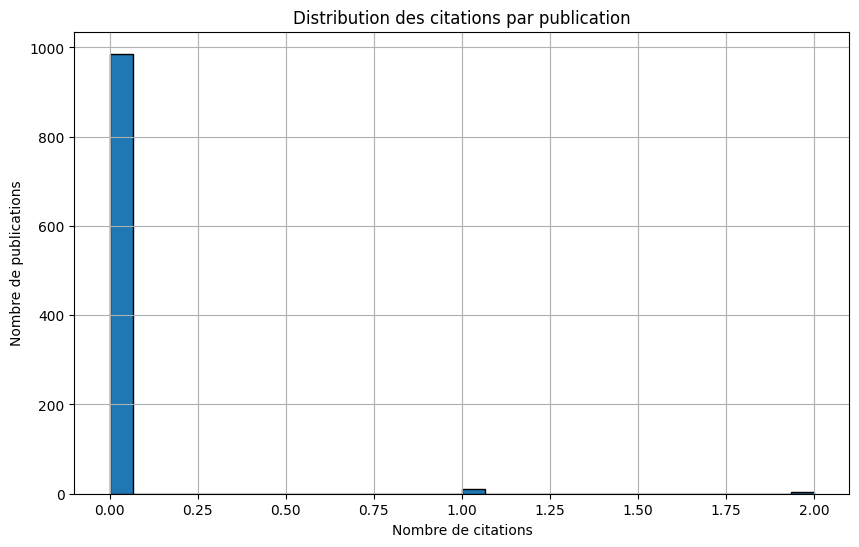

In [79]:
def plot_citations_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['citedby_count'], bins=30, edgecolor='black')
    plt.title('Distribution des citations par publication')
    plt.xlabel('Nombre de citations')
    plt.ylabel('Nombre de publications')
    plt.grid(True)
    plt.show()

# Tester la fonction
plot_citations_distribution(df)


# Citations par Année : Analyser les citations par année
Pour analyser les citations par année, nous allons d'abord extraire l'année à partir de la colonne coverDate, puis regrouper et calculer les statistiques nécessaires.

In [80]:
def citations_by_year(df):
    # Extraire l'année à partir de la colonne coverDate
    df['coverYear'] = pd.to_datetime(df['coverDate']).dt.year

    # Grouper par année et calculer les statistiques
    citations_yearly = df.groupby('coverYear')['citedby_count'].agg(['sum', 'mean', 'count']).reset_index()

    return citations_yearly

# Tester la fonction
citations_yearly = citations_by_year(df)
print(citations_yearly)

   coverYear  sum      mean  count
0       2024   11  0.011892    925
1       2025    7  0.093333     75


<ipython-input-86-e8acfd4692d1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coverYear', y='sum', data=citations_yearly, palette='viridis')


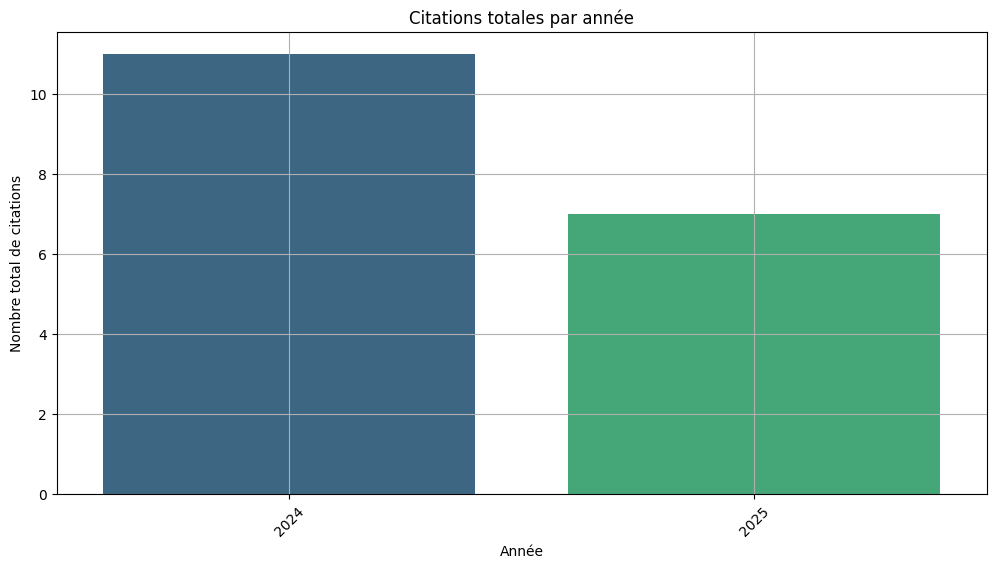

In [86]:
import seaborn as sns

def plot_citations_by_year(df):
    citations_yearly = citations_by_year(df)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='coverYear', y='sum', data=citations_yearly, palette='viridis')
    plt.title('Citations totales par année')
    plt.xlabel('Année')
    plt.ylabel('Nombre total de citations')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Tester la fonction
plot_citations_by_year(df)


# Répartition des Publications par Auteur : Analyse de la répartition des publications par auteur
Pour analyser la répartition des publications par auteur, nous allons compter le nombre de publications pour chaque auteur principal (dc:creator).

In [82]:
def publications_by_author(df):
    author_counts = df['creator'].value_counts().reset_index()
    author_counts.columns = ['Author', 'Publication Count']
    return author_counts

# Tester la fonction
author_counts = publications_by_author(df)
print(author_counts.head(20))  # Afficher les 10 premiers auteurs par nombre de publications


         Author  Publication Count
0       Wang Y.                  4
1       Wang G.                  4
2      Zhang S.                  4
3       Wang L.                  4
4       Wang J.                  4
5       Wang X.                  3
6      Zhang J.                  3
7         Li S.                  3
8      Zhang M.                  3
9       Zhou J.                  3
10        Li X.                  3
11      Wang M.                  3
12        Wu Y.                  3
13        Du C.                  3
14       Liu Z.                  3
15     Zhang X.                  3
16     Kim J.T.                  2
17  Zierke M.A.                  2
18    Salter F.                  2
19      Ma L.W.                  2


<ipython-input-89-09425fad863c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publication Count', y='Author', data=author_counts.head(10), palette='viridis')


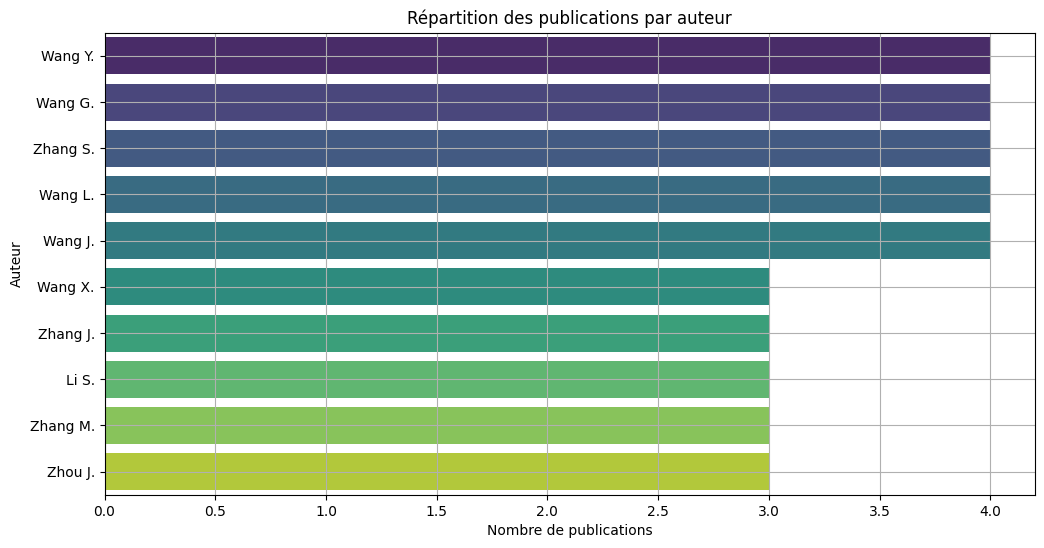

In [89]:
def plot_publications_by_author(df):
    author_counts = publications_by_author(df)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Publication Count', y='Author', data=author_counts.head(10), palette='viridis')
    plt.title('Répartition des publications par auteur')
    plt.xlabel('Nombre de publications')
    plt.ylabel('Auteur')
    plt.grid(True)
    plt.show()

# Tester la fonction
plot_publications_by_author(df)


# Calculer la corrélation entre le nombre de citations et les années de publication
Pour calculer la corrélation entre le nombre de citations et les années de publication, nous utiliserons la méthode .corr() sur les colonnes pertinentes.

In [83]:
def citations_year_correlation(df):
    # Extraire l'année à partir de la colonne coverDate
    df['coverYear'] = pd.to_datetime(df['coverDate']).dt.year

    # Calculer la corrélation entre citedby_count et coverYear
    correlation = df['citedby_count'].corr(df['coverYear'])

    return correlation

# Tester la fonction
correlation = citations_year_correlation(df)
print(f"Corrélation entre le nombre de citations et les années de publication : {correlation:.2f}")

Corrélation entre le nombre de citations et les années de publication : 0.13


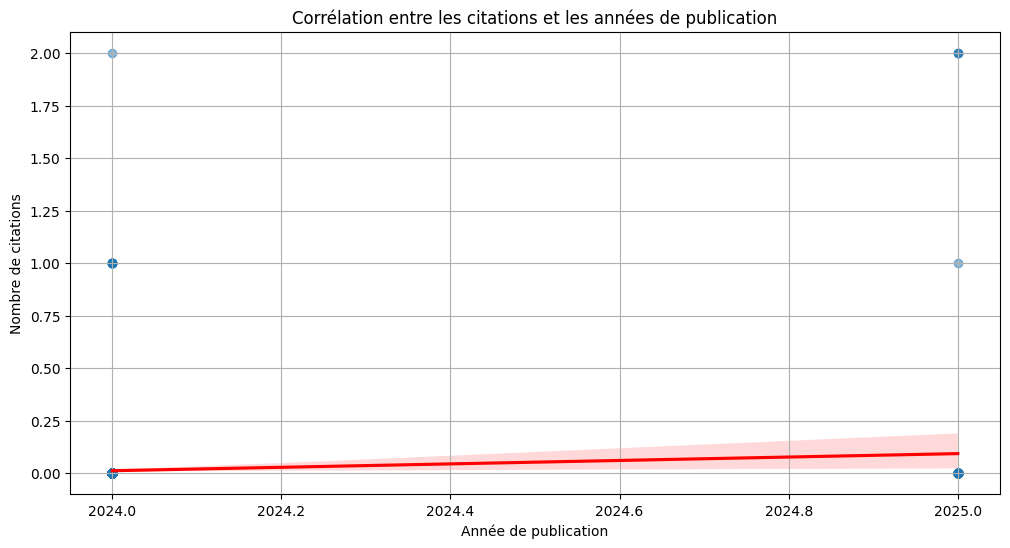

In [90]:
def plot_citations_year_correlation(df):
    df['coverYear'] = pd.to_datetime(df['coverDate']).dt.year

    plt.figure(figsize=(12, 6))
    sns.regplot(x='coverYear', y='citedby_count', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Corrélation entre les citations et les années de publication')
    plt.xlabel('Année de publication')
    plt.ylabel('Nombre de citations')
    plt.grid(True)
    plt.show()

# Tester la fonction
plot_citations_year_correlation(df)


# Graphique linéaire pour montrer la tendance des publications au fil du temps

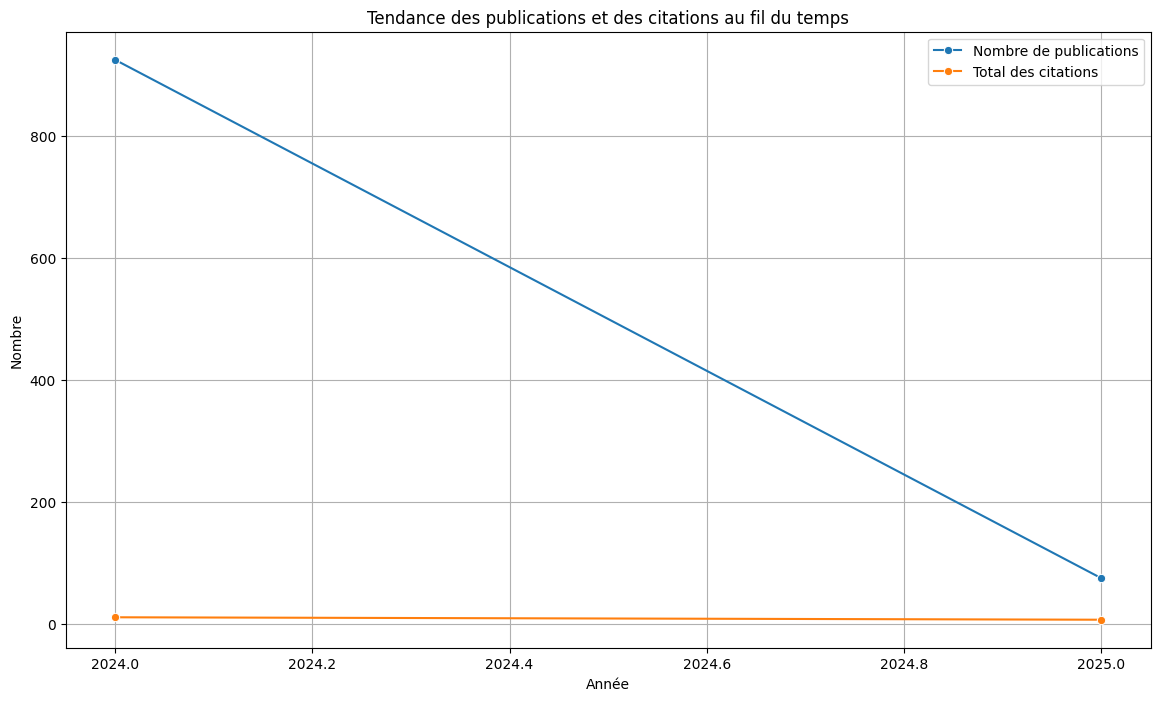

In [97]:
def plot_publications_over_time(citations_yearly):
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=citations_yearly, x='coverYear', y='count', marker='o', label='Nombre de publications')
    sns.lineplot(data=citations_yearly, x='coverYear', y='sum', marker='o', label='Total des citations')
    plt.title('Tendance des publications et des citations au fil du temps')
    plt.xlabel('Année')
    plt.ylabel('Nombre')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tester la fonction de visualisation
plot_publications_over_time(citations_yearly)


# enregistrement de la dataset pour la reutiliser

In [95]:
# Enregistrer la DataFrame principale dans un fichier CSV
df.to_csv('publications_dataset.csv', index=False)

print("La DataFrame a été enregistrée dans 'publications_dataset.csv'.")


La DataFrame a été enregistrée dans 'publications_dataset.csv'.


# **`DEUXIEME PARTIE OPTIONNELLE `**

---
# Intégration de `RDF et SPARQL `

---

# Conversion en RDF







Nous allons utiliser la bibliothèque rdflib pour convertir les données en RDF. RDF utilise des triplets (sujet, prédicat, objet) pour représenter les données.

In [2]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00


In [3]:
import rdflib
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import FOAF, DC

# chargement de la dataset qu'on avait sauvegarder precedement

In [5]:
from google.colab import files

# Télécharger le fichier CSV depuis votre machine locale
uploaded = files.upload()

# Afficher les noms des fichiers téléchargés
for filename in uploaded.keys():
    print(f'Fichier téléchargé: {filename}')


Saving publications_dataset.csv to publications_dataset.csv
Fichier téléchargé: publications_dataset.csv


In [9]:
# Charger le fichier CSV
df_new = pd.read_csv('publications_dataset.csv')

# Afficher les premières lignes du nouveau dataset
df_new.head()

,title,creator,publicationName,coverDate,doi,citedby_count,coverYear
0,Dysbiosis not observed in Canadian horse with ...,Wester R.J.,Scientific Reports,2024-12-01,10.1038/s41598-024-63868-1,0,2024
1,Relationship between ion currents and membrane...,Horváth B.,Scientific Reports,2024-12-01,10.1038/s41598-024-61736-6,0,2024
2,Familial risk for depression is associated wit...,Dell’Acqua C.,Translational Psychiatry,2024-12-01,10.1038/s41398-024-02925-9,0,2024
3,Effect of swab and surge pressure on the time-...,Kamgue Lenwoue A.R.,Geomechanics and Geophysics for Geo-Energy and...,2024-12-01,10.1007/s40948-024-00793-7,0,2024
4,Anomalously weak intensity of tropical cyclone...,Yang Y.,npj Climate and Atmospheric Science,2024-12-01,10.1038/s41612-024-00656-8,0,2024


In [11]:
# Créer un graphe RDF
g = Graph()

# Définir des namespaces
n = rdflib.Namespace("http://example.org/")

df = df_new

# Ajouter des triplets au graphe
for index, row in df.iterrows():
    publication = URIRef(f"http://example.org/publication/{index}")
    g.add((publication, RDF.type, n.Publication))
    g.add((publication, DC.title, Literal(row['title'])))
    g.add((publication, DC.creator, Literal(row['creator'])))
    g.add((publication, DC.source, Literal(row['publicationName'])))
    g.add((publication, DC.date, Literal(row['coverDate'])))
    g.add((publication, n.doi, Literal(row['doi'])))
    g.add((publication, n.citedbyCount, Literal(row['citedby_count'], datatype=rdflib.XSD.integer)))

# Sauvegarder le graphe RDF dans un fichier
g.serialize("publications.rdf", format="turtle")

print("Données converties en RDF et enregistrées dans 'publications.rdf'.")


Données converties en RDF et enregistrées dans 'publications.rdf'.


# `Exécution de Requêtes SPARQL`

---


# Exemple 1 : Récupérer un certain nombre de publications

In [17]:
from rdflib import Graph
from rdflib.plugins.sparql import prepareQuery

# Charger le graphe RDF
g = Graph()
g.parse("publications.rdf", format="turtle")

# Nombre de publications à récupérer
limit = 100

# Requête SPARQL pour récupérer un certain nombre de publications
query = prepareQuery(f"""
    SELECT ?title ?creator ?date
    WHERE {{
        ?publication a <http://example.org/Publication> ;
                     <http://purl.org/dc/elements/1.1/title> ?title ;
                     <http://purl.org/dc/elements/1.1/creator> ?creator ;
                     <http://purl.org/dc/elements/1.1/date> ?date .
    }}
    LIMIT {limit}
""")

# Exécuter la requête et afficher les résultats
for row in g.query(query):
    print(f"Title: {row.title}, Creator: {row.creator}, Date: {row.date}")


Title: Dysbiosis not observed in Canadian horse with free fecal liquid (FFL) using 16S rRNA sequencing, Creator: Wester R.J., Date: 2024-12-01
Title: Relationship between ion currents and membrane capacitance in canine ventricular myocytes, Creator: Horváth B., Date: 2024-12-01
Title: Synergistic mechanism of electrocatalytic degradation of typical antibiotics by high-entropy MXenes modified metal organic gels catalysts: Theoretical and experimental studies, Creator: Liu G., Date: 2025-01-01
Title: 7 Tesla magnetic resonance spectroscopic imaging predicting IDH status and glioma grading, Creator: Cadrien C., Date: 2024-12-01
Title: Utility of shaking chills as a diagnostic sign for bacteremia in adults: a systematic review and meta-analysis, Creator: Aita T., Date: 2024-12-01
Title: Machine learning survival prediction using tumor lipid metabolism genes for osteosarcoma, Creator: Li S., Date: 2024-12-01
Title: Neither injury induced macrophages within the nerve, nor the environment cre

# Exemple 2 : Récupérer les publications qui ont des citations

In [15]:
# Requête SPARQL pour récupérer les publications avec plus de 10 citations
query = prepareQuery("""
    SELECT ?title ?citedbyCount
    WHERE {
        ?publication a <http://example.org/Publication> ;
                     <http://purl.org/dc/elements/1.1/title> ?title ;
                     <http://example.org/citedbyCount> ?citedbyCount .
        FILTER (?citedbyCount > 0)
    }
""")

# Exécuter la requête et afficher les résultats
for row in g.query(query):
    print(f"Title: {row.title}, Citations: {row.citedbyCount}")


Title: Exploring the diversity of dissolved organic matter (DOM) properties and sources in different functional areas of a typical macrophyte - derived lake combined with optical spectroscopy and FT-ICR MS analysis, Citations: 1
Title: Analyzing vegetation health dynamics across seasons and regions through NDVI and climatic variables, Citations: 1
Title: Association between a body shape index and cognitive impairment among us older adults from a cross-sectional survey of the NHANES 2011–2014, Citations: 1
Title: Emission control status and future perspectives of diesel trucks in China, Citations: 2
Title: Enhancement of strength and ductile-brittle transition temperature of SA508 Gr.3 low-alloy steel by controlling heat accumulation in laser powder-directed energy deposition, Citations: 1
Title: The Rapid ASKAP Continuum Survey V: Cataloguing the sky at 1 367.5 MHz and the second data release of RACS-mid, Citations: 1
Title: Technology factors and ERP system efficiency in the Jordanian

# **`Conclusion`**
L'intégration de RDF et SPARQL dans notre projet permet de structurer les données de manière flexible et interopérable, facilitant les requêtes complexes et l'intégration avec d'autres sources de données. En convertissant les données récupérées en RDF et en utilisant SPARQL pour les interroger, on peut effectuer des analyses sophistiquées et obtenir des informations précieuses.